In [21]:
!pip install -r requirements.txt

In [22]:
import pandas as pd
import numpy as np
from eep153_tools.sheets import read_sheets

Link to dietary requirements by age:
https://docs.google.com/spreadsheets/d/1y95IsQ4HKspPW3HHDtH7QMtlDA66IUsCHJLutVL-MMc/

# Minimum Cost Diet Solution

1. Fill spreadsheet with foods and their fdc ID and prices from stores accessible in the East Oakland food desert
2. Connect these foods with their nutrient profiles 
3. Solve system of equations to determine the minimum cost diet (price and composition) available to residents of the    east Oakland food desert

In [23]:
dri = read_sheets("1y95IsQ4HKspPW3HHDtH7QMtlDA66IUsCHJLutVL-MMc")
# Define *minimums*
diet_min = dri['diet_minimums']
# Define *maximums*
diet_max = dri['diet_maximums']

diet_min.head(5)

Key available for students@eep153.iam.gserviceaccount.com.


,Nutrition,Source,C 1-3,F 4-8,M 4-8,F 9-13,M 9-13,F 14-18,M 14-18,F 19-30,M 19-30,F 31-50,M 31-50,F 51+,M 51+
0,Energy,---,1000.0,1200.0,1400.0,1600.0,1800.0,1800.0,2200.0,2000.0,2400.0,1800.0,2200.0,1600.0,2000.0
1,Protein,RDA,13.0,19.0,19.0,34.0,34.0,46.0,52.0,46.0,56.0,46.0,56.0,46.0,56.0
2,"Fiber, total dietary",---,14.0,16.8,19.6,22.4,25.2,25.2,30.8,28.0,33.6,25.2,30.8,22.4,28.0
3,"Folate, DFE",RDA,150.0,200.0,200.0,300.0,300.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
4,"Calcium, Ca",RDA,700.0,1000.0,1000.0,1300.0,1300.0,1300.0,1300.0,1000.0,1000.0,1000.0,1000.0,1200.0,1000.0


In [24]:
b_min = diet_min.set_index('Nutrition').iloc[:, 1:]
b_max = diet_max.set_index('Nutrition').iloc[:, 1:]

In [25]:
b_min.head(5)

,C 1-3,F 4-8,M 4-8,F 9-13,M 9-13,F 14-18,M 14-18,F 19-30,M 19-30,F 31-50,M 31-50,F 51+,M 51+
Nutrition,,,,,,,,,,,,,
Energy,1000.0,1200.0,1400.0,1600.0,1800.0,1800.0,2200.0,2000.0,2400.0,1800.0,2200.0,1600.0,2000.0
Protein,13.0,19.0,19.0,34.0,34.0,46.0,52.0,46.0,56.0,46.0,56.0,46.0,56.0
"Fiber, total dietary",14.0,16.8,19.6,22.4,25.2,25.2,30.8,28.0,33.6,25.2,30.8,22.4,28.0
"Folate, DFE",150.0,200.0,200.0,300.0,300.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
"Calcium, Ca",700.0,1000.0,1000.0,1300.0,1300.0,1300.0,1300.0,1000.0,1000.0,1000.0,1000.0,1200.0,1000.0


In [26]:
b = pd.concat([b_min, -b_max])

In [27]:
b.head()

,C 1-3,F 4-8,M 4-8,F 9-13,M 9-13,F 14-18,M 14-18,F 19-30,M 19-30,F 31-50,M 31-50,F 51+,M 51+
Nutrition,,,,,,,,,,,,,
Energy,1000.0,1200.0,1400.0,1600.0,1800.0,1800.0,2200.0,2000.0,2400.0,1800.0,2200.0,1600.0,2000.0
Protein,13.0,19.0,19.0,34.0,34.0,46.0,52.0,46.0,56.0,46.0,56.0,46.0,56.0
"Fiber, total dietary",14.0,16.8,19.6,22.4,25.2,25.2,30.8,28.0,33.6,25.2,30.8,22.4,28.0
"Folate, DFE",150.0,200.0,200.0,300.0,300.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0
"Calcium, Ca",700.0,1000.0,1000.0,1300.0,1300.0,1300.0,1300.0,1000.0,1000.0,1000.0,1000.0,1200.0,1000.0


Function to return RDAs for an age-sex group

In [28]:
def get_dri(age, sex, nutrients):
    """Returns recommended daily allowances for a range of nutrients for a person a given age and sex.

    Keyword arguments:
    age (int) -- an  age, from 1-120 (inclusive) 
    sex (str) -- a sex, either 'M', or 'F'
    nutrients -- pandas DataFrame of nutrient RDAs by age and sex  
    """
    if age < 4:
        return nutrients.iloc[:, 0] 
    df = nutrients.filter(regex=sex)
    bin_edges = np.array([9, 14, 19, 31, 51, 121])
    col_pos = np.where(age < bin_edges)[0][0]
    return df.iloc[:, col_pos]

In [29]:
get_dri(52, 'F', b)

Nutrition
Energy                            1600.0
Protein                             46.0
Fiber, total dietary                22.4
Folate, DFE                        400.0
Calcium, Ca                       1200.0
Carbohydrate, by difference        130.0
Iron, Fe                             8.0
Magnesium, Mg                      320.0
Niacin                              14.0
Phosphorus, P                      700.0
Potassium, K                      4700.0
Riboflavin                           1.1
Thiamin                              1.1
Vitamin A, RAE                     700.0
Vitamin B-12                         2.4
Vitamin B-6                          1.5
Vitamin C, total ascorbic acid      75.0
Vitamin E (alpha-tocopherol)        15.0
Vitamin K (phylloquinone)           90.0
Zinc, Zn                             8.0
Sodium, Na                       -2300.0
Name: F 51+, dtype: float64

In [30]:
apikey = "m60Lzdxm5EVVHiCGYLEL1OoV9E4U3rVtfFrYrqVm"

In [31]:
import fooddatacentral as fdc

fdc.search(apikey,"red pepper")

,fdcId,description,lowercaseDescription,dataType,gtinUpc,publishedDate,brandOwner,brandName,ingredients,marketCountry,...,foodAttributes,foodAttributeTypes,foodVersionIds,commonNames,additionalDescriptions,foodCode,foodCategoryId,ndbNumber,scientificName,mostRecentAcquisitionDate
0,1922829,RED PEPPER,red pepper,Branded,186986000590,2021-07-29,Greenleaf Music Inc.,LEGNANO,"SWEET PEPPERS, SUNFLOWER OIL, RICOTTA CHEESE (...",United States,...,[],[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2059160,RED PEPPER,red pepper,Branded,035826089526,2021-10-28,Food Town Stores Inc.,FOOD LION,PEPPERS.,United States,...,[],[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1103562,"Peppers, red, cooked","peppers, red, cooked",Survey (FNDDS),NaN,2020-10-30,NaN,NaN,NaN,NaN,...,[],"[{'name': 'Adjustments', 'description': 'Adjus...",[],,orange or yellow peppers;with or without fat,75226060.0,999281.0,NaN,NaN,NaN
3,1103372,"Pepper, sweet, red, raw","pepper, sweet, red, raw",Survey (FNDDS),NaN,2020-10-30,NaN,NaN,NaN,NaN,...,[],"[{'name': 'Attribute', 'description': 'Generic...",[],,,75122200.0,999091.0,NaN,NaN,NaN
4,170108,"Peppers, sweet, red, raw","peppers, sweet, red, raw",SR Legacy,NaN,2019-04-01,NaN,NaN,NaN,NaN,...,[],[],[],,,NaN,NaN,11821.0,NaN,NaN
5,168550,"Peppers, sweet, red, sauteed","peppers, sweet, red, sauteed",SR Legacy,NaN,2019-04-01,NaN,NaN,NaN,NaN,...,[],[],[],,,NaN,NaN,11921.0,NaN,NaN
6,1104581,"Red pepper, cooked, as ingredient","red pepper, cooked, as ingredient",Survey (FNDDS),NaN,2020-10-30,NaN,NaN,NaN,NaN,...,[],"[{'name': 'Adjustments', 'description': 'Adjus...",[],,,99997525.0,1000300.0,NaN,NaN,NaN
7,170932,"Spices, pepper, red or cayenne","spices, pepper, red or cayenne",SR Legacy,NaN,2019-04-01,NaN,NaN,NaN,NaN,...,[],[],[],,,NaN,NaN,2031.0,Capsicum frutescens or Capsicum annuum,NaN
8,170106,"Peppers, hot chili, red, raw","peppers, hot chili, red, raw",SR Legacy,NaN,2019-04-01,NaN,NaN,NaN,NaN,...,[],[],[],,,NaN,NaN,11819.0,NaN,NaN
9,169373,"Peppers, sweet, red, freeze-dried","peppers, sweet, red, freeze-dried",SR Legacy,NaN,2019-04-01,NaN,NaN,NaN,NaN,...,[],[],[],,,NaN,NaN,11931.0,NaN,NaN


In [32]:
fdc.nutrients(apikey,fdc_id=2092152)

,Quantity,Units
"Fatty acids, total saturated",1.79,g
"Sugars, total including NLEA",0.00,g
"Fatty acids, total monounsaturated",3.57,g
Total lipid (fat),8.93,g
Protein,14.29,g
Cholesterol,54.00,mg
"Sodium, Na",929.00,mg
"Carbohydrate, by difference",3.57,g
Energy,143.00,kcal
"Calcium, Ca",0.00,mg


In [33]:
print(fdc.units(200,'head'))

600.0 hectogram


Load our spreadsheet population with Foods and their price, FDC ID, brand, etc.

In [34]:
prices = pd.read_csv('foodprices_chick.csv', header=[1], dtype={'Price (Minimum)': float})
prices.rename(columns={'Food/Ingredients (dinner plate for low income w/ EBT constraint)':'Food'}, inplace=True)
prices.head(7)

,Food,FDC,FDC Brand,Quantity,Units,Price (Safeway),Price (Smart & Final Extra!),Price (FoodMaxx),Price (Minimum)
0,Romaine Lettuce,746769,(Staple),1,head,2.79,1.39,1.89,1.39
1,Brussel Sprouts,1103340,(FNDDS),1,pound,3.99,2.49,2.98,2.49
2,Green Beans,321611,(Staple),1,pound,2.99,1.99,1.99,1.99
3,Crimini Mushrooms,2003601,(Staple),1,ounces,0.37,NaN,0.23,0.23
4,Shredded Carrots,746764,(Staple),10,ounces,1.99,NaN,1.59,1.59
5,Whole Wheat Bread,335240,(Staple),1,pound,1.99,2.19,2.09,1.99
6,Spaghetti,1858190,Dreamfields,1,pound,1.59,1.59,0.99,0.99


In [50]:
# Convert food quantities to FDC units
prices['FDC Quantity'] = prices[['Quantity','Units']].T.apply(lambda x : fdc.units(x['Quantity'],x['Units']))

#Now divide price by the FDC Quantity to get, e.g., price per hectoliter
prices['FDC Price (Minimum)'] = prices['Price (Minimum) ']/prices['FDC Quantity']

prices.dropna(how='any') # Drop food with any missing data

# To use minimum price observed
#prices = prices.groupby('Food/Ingredients (dinner plate for low income w/ EBT constraint)')['FDC Price'].min()

prices.head()

/opt/conda/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1990: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  result[:] = values


,Food,FDC,FDC Brand,Quantity,Units,Price (Safeway),Price (Smart & Final Extra!),Price (FoodMaxx),Price (Minimum),FDC Quantity,FDC Price (Minimum)
0,Romaine Lettuce,746769,(Staple),1,head,2.79,1.39,1.89,1.39,3.0 hectogram,0.4633333333333333 / hectogram
1,Brussel Sprouts,1103340,(FNDDS),1,pound,3.99,2.49,2.98,2.49,4.535923700000001 hectogram,0.5489510328403452 / hectogram
2,Green Beans,321611,(Staple),1,pound,2.99,1.99,1.99,1.99,4.535923700000001 hectogram,0.4387199017479063 / hectogram
3,Crimini Mushrooms,2003601,(Staple),1,ounces,0.37,NaN,0.23,0.23,0.28349523125000003 hectogram,0.8113011248403494 / hectogram
4,Shredded Carrots,746764,(Staple),10,ounces,1.99,NaN,1.59,1.59,2.8349523125000005 hectogram,0.5608559949983285 / hectogram


Create our D dataframe - connecting foods with their nutrient profiles.

Odd behavior from fdc API here - the below function occasionally fails, but we have no insight into why. If it errors, just run again and it should work.

In [36]:
import fooddatacentral as fdc

D = {}
count = 0
for food in prices.Food.tolist():
    try:
        print(food)
        FDC = prices.loc[prices.Food==food,:].FDC[count]
        count+=1
        D[food] = fdc.nutrients(apikey,FDC).Quantity
    except AttributeError: 
        warnings.warn("Couldn't find FDC Code %s for food %s." % (food,FDC))        

D = pd.DataFrame(D,dtype=float)

D

Romaine Lettuce 
Brussel Sprouts
Green Beans 
Crimini Mushrooms 
Shredded Carrots 
Whole Wheat Bread 
Spaghetti 
Pasta Sauce
Seedless red or green grapes 
Olives 
Chicken Breast 
Ground Beef (15% fat)
Russett Potatoes
Navel Oranges
Roma Tomatoes
Fuji Apples
Bananas
Pineapples
Turkey (ground)
Tuna (canned)
Catfish (filet)
Lamb (ground)
Pork (loin or ham)
Eggs
Shredded Cheese
Whole Milk
Almond milk
Butter
Sour Cream
Yogurt (nonfat, plain, Greek)
Corn Tortillas
Plain Bagels
Pita
White Rice


,Romaine Lettuce,Brussel Sprouts,Green Beans,Crimini Mushrooms,Shredded Carrots,Whole Wheat Bread,Spaghetti,Pasta Sauce,Seedless red or green grapes,Olives,...,Shredded Cheese,Whole Milk,Almond milk,Butter,Sour Cream,"Yogurt (nonfat, plain, Greek)",Corn Tortillas,Plain Bagels,Pita,White Rice
10-Formyl folic acid (10HCOFA),9.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25-hydroxycholecalciferol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00,NaN,0.110,NaN,NaN,NaN,NaN,NaN,NaN
5-Formyltetrahydrofolic acid (5-HCOH4,5.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5-methyl tetrahydrofolate (5-MTHF),40.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alanine,0.056,NaN,NaN,NaN,0.075,NaN,NaN,NaN,NaN,NaN,...,NaN,0.11,NaN,0.017,NaN,0.35,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cis-Lutein/Zeaxanthin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN
cis-Lycopene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN
cis-beta-Carotene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.00,NaN,27.000,NaN,NaN,NaN,NaN,NaN,NaN
trans-Lycopene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
price_min = prices.groupby('Food')['FDC Price (Minimum)'].min()
price_min

Food
Almond milk                      0.13155768207435797 / deciliter
Bananas                          0.13007273468907776 / hectogram
Brussel Sprouts                   0.5489510328403452 / hectogram
Butter                            0.6090637429960883 / hectogram
Catfish (filet)                   1.5864464386823787 / hectogram
Chicken Breast                     1.100106688302539 / hectogram
Corn Tortillas                    0.2666711523388279 / hectogram
Crimini Mushrooms                 0.8113011248403494 / hectogram
Eggs                              0.5017006802721089 / hectogram
Fuji Apples                      0.21825763956302877 / hectogram
Green Beans                       0.4387199017479063 / hectogram
Ground Beef (15% fat)             0.9369646142857296 / hectogram
Lamb (ground)                     1.0119217834285879 / hectogram
Navel Oranges                    0.21825763956302877 / hectogram
Olives                            0.9288809980056175 / hectogram
Pasta Sauce         

Creating p vector (food prices)

In [51]:
p = price_min.apply(lambda x:x.magnitude).dropna()

# Compile list that we have both prices and nutritional info for; drop if either missing
use = list(set(p.index.tolist()).intersection(D.columns.tolist()))
p = p[use]

p

Food
Ground Beef (15% fat)            0.936965
Fuji Apples                      0.218258
White Rice                       0.175267
Turkey (ground)                  1.100107
Green Beans                      0.438720
Spaghetti                        0.218258
Seedless red or green grapes     0.656978
Bananas                          0.130073
Olives                           0.928881
Lamb (ground)                    1.011922
Chicken Breast                   1.100107
Catfish (filet)                  1.586446
Almond milk                      0.131558
Romaine Lettuce                  0.463333
Shredded Cheese                  1.027354
Pita                             0.496775
Russett Potatoes                 0.108027
Crimini Mushrooms                0.811301
Navel Oranges                    0.218258
Eggs                             0.501701
Pasta Sauce                      0.218993
Corn Tortillas                   0.266671
Brussel Sprouts                  0.548951
Pineapples                   

Taken from lecture - 

In [52]:
# Drop nutritional information for foods we don't know the price of,
# and replace missing nutrients with zeros.
Aall = D[p.index].fillna(0)

# Drop rows of A that we don't have constraints for.
Amin = Aall[Aall.index.isin(b_min.index)]

Amax = Aall[Aall.index.isin(b_max.index)]

# Minimum requirements involve multiplying constraint by -1 to make <=.
A = pd.concat([Amin,-Amax])
b = b.reindex(A.index)

A

,Ground Beef (15% fat),Fuji Apples,White Rice,Turkey (ground),Green Beans,Spaghetti,Seedless red or green grapes,Bananas,Olives,Lamb (ground),...,Sour Cream,Whole Wheat Bread,Shredded Carrots,Plain Bagels,Roma Tomatoes,Pork (loin or ham),"Yogurt (nonfat, plain, Greek)",Butter,Whole Milk,Tuna (canned)
"Calcium, Ca",24.000,5.975000,6.000,31.000,36.00,18.000,14.00,5.000,0.00,22.000,...,133.00,163.000,33.000,71.000,9.963000,0.00,111.000,21.00,123.000,18.000
"Carbohydrate, by difference",0.000,15.651162,79.800,0.000,4.11,75.000,17.39,23.000,6.25,0.000,...,6.67,43.100,7.920,55.290,3.837475,0.89,3.640,0.00,4.630,0.080
Energy,260.000,0.000000,1500.000,922.000,86.00,339.000,65.00,408.000,125.00,281.000,...,200.00,1060.000,153.000,271.000,0.000000,143.00,256.000,0.00,251.000,376.000
"Fiber, total dietary",0.000,2.075000,0.500,0.000,0.00,8.900,0.70,1.700,6.20,0.000,...,0.00,6.000,3.200,2.400,0.970600,0.00,0.000,0.00,0.000,0.000
"Folate, DFE",10.000,0.000000,0.000,0.000,0.00,0.000,0.00,0.000,0.00,19.000,...,0.00,0.000,0.000,0.000,0.000000,0.00,0.000,0.00,0.000,0.000
"Iron, Fe",2.470,0.015000,0.220,1.560,0.78,3.040,0.26,0.000,6.25,1.780,...,0.00,2.560,0.430,3.060,0.103100,0.32,0.070,0.06,0.000,1.670
"Magnesium, Mg",20.000,4.670000,22.900,29.100,12.70,0.000,0.00,28.000,0.00,24.000,...,0.00,76.600,10.800,0.000,8.089000,0.00,10.700,1.60,11.900,22.700
Niacin,5.070,0.090630,1.250,8.090,0.00,5.536,0.00,0.662,0.00,6.644,...,0.00,4.430,0.465,4.000,0.533100,0.00,0.211,0.00,0.105,9.920
"Phosphorus, P",192.000,9.780000,94.000,259.000,23.00,0.000,0.00,22.000,0.00,199.000,...,0.00,212.000,31.000,0.000,19.090000,0.00,136.000,22.00,101.000,137.000
"Potassium, K",302.000,103.800000,75.000,304.000,97.00,214.000,0.00,326.000,0.00,336.000,...,167.00,250.000,210.000,82.000,192.800000,0.00,141.000,23.00,150.000,176.000


In [53]:
# Ensure that indices are the same between A and b and that they are in the same order 
A = A[A.index.isin(b.index)]
b = b[b.index.isin(A.index)]
b = b.reindex(A.index)

Time for the solution! We look at a single age group, females ages 19-30. 

In [54]:
from  scipy.optimize import linprog as lp
import numpy as np

tol = 1e-6 # Tolerance for food quantities 

## Choose sex/age group
group = "F 19-30"

result = lp(p, -A, -b[group], method='interior-point')

result

     con: array([], dtype=float64)
     fun: 5.83171669846285
 message: 'Optimization terminated successfully.'
     nit: 18
   slack: array([9.14225848e-06, 1.63748263e+02, 1.47476696e+03, 2.21396599e+01,
       2.57234603e-07, 2.73715877e-08, 4.00328673e+01, 7.45559754e+00,
       2.76150048e+02, 3.10828909e-06, 2.31160783e+01, 5.36286748e-01,
       1.99181845e+00, 1.66475957e-06, 4.62356932e-07, 1.25997781e+00,
       5.21658101e+02, 2.55341821e-07, 1.13603519e+03, 1.13866676e-08,
       1.39713895e+03])
  status: 0
 success: True
       x: array([3.64407807e-01, 6.36876234e-09, 1.83052817e-06, 2.36623455e-09,
       2.54312132e-09, 1.54553424e+00, 1.68624630e-09, 3.33142139e+00,
       1.73186759e-09, 4.99731275e-09, 1.08087925e-09, 7.25599794e-10,
       2.06342182e+00, 7.35300191e-01, 2.02780028e-09, 2.75784125e-09,
       1.50905972e-08, 1.87860699e-09, 7.29805918e-09, 2.01085830e-09,
       1.16236566e-09, 6.79171417e-09, 6.49763807e+00, 1.47852807e-09,
       3.29486022e-09, 

In [46]:
# Put back into nice series
diet = pd.Series(result.x,index=p.index)

print("\nYou'll be eating (in 100s of grams or milliliters):")
print(diet[diet >= tol])  # Drop items with quantities less than precision of calculation.


You'll be eating (in 100s of grams or milliliters):
Food
Ground Beef (15% fat)    0.364408
White Rice               0.000002
Spaghetti                1.545534
Bananas                  3.331421
Almond milk              2.063422
Romaine Lettuce          0.735300
Brussel Sprouts          6.497638
Whole Wheat Bread        0.784404
Whole Milk               1.332768
dtype: float64


# Sensitivity of solution

In [47]:
#import pandas_alive
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

How does diet price change over time, when a volatile item like meat changes price? 

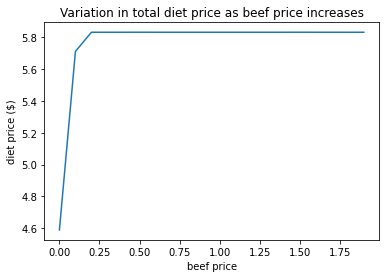

In [55]:
from  scipy.optimize import linprog as lp
import numpy as np

group = "F 19-30"

# Calculate diet total price as an essential ingredient, ground beef, increases in price 
prices_range = np.arange(0, 2, 0.1)
diet_price_over_time = []
p_over_time = p.copy(deep=False)
    
for i in prices_range:
    p_over_time.loc[food] = i
    result = lp(p_over_time, -A, -b[group], method='interior-point')
    diet_price_over_time.append(result['fun'])
    
df = pd.DataFrame({'diet price ($)': diet_price_over_time, 'beef price': prices_range})
sns.lineplot(data = df, x = 'beef price', y="diet price ($)")

plt.title('Variation in total diet price as beef price increases');

The optimal diet relies on beef until it gets too expensive, then it drops beef out completely and total diet price is unaffected by changes in beef prices. Small increases in beef prices cause a large shift in the overall diet price